### GPN's Brain Aging Prediction Data - Step01_structural_processing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data.datautils import get_first_batch
from radio.data.datavisualization import plot_batch

#### Setup Data

In [7]:
# Load pre-stored data from train/test/val folders 
data = rio.data.BrainAgingPredictionDataModule(
    root="/media/cerebro/Studies",
    study="Brain_Aging_Prediction",
    subj_dir="Public/data",
    data_dir="step01_structural_processing",
    use_augmentation=False,
    use_preprocessing=False,
    resample=False,
    batch_size=4,
    modalities=["T1", "FLAIR"],
    labels=[],
)
data.prepare_data()
data.setup()

/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:126: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(


In [8]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 496 subjects.
Validation: 123 subjects.
Test: 155 subjects.


#### Get a Train and a Test Batch

In [9]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()
test_dataloader = data.test_dataloader()

In [10]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
test_batch = get_first_batch(test_dataloader)

In [15]:
print(f"Number of samples in batch: {len(train_batch)}")
print(f"Batch keys: {train_batch.keys()}")
print(f"Subject IDs: {train_batch['subj_id']}")
print(f"Sample shape: {train_batch['T1']['data'].shape}")
print(f"Image keys: {train_batch['T1'].keys()}")

Number of samples in batch: 4
Batch keys: dict_keys(['subj_id', 'scan_id', 'T1', 'FLAIR'])
Subject IDs: ['ABD_AJ_0098', 'ABD_AJ_0162', 'ABD_GJ_0182', 'ABD_SW_0140']
Sample shape: torch.Size([4, 1, 157, 189, 156])
Image keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])


#### Plot Example Samples from Batches

Subject: 1


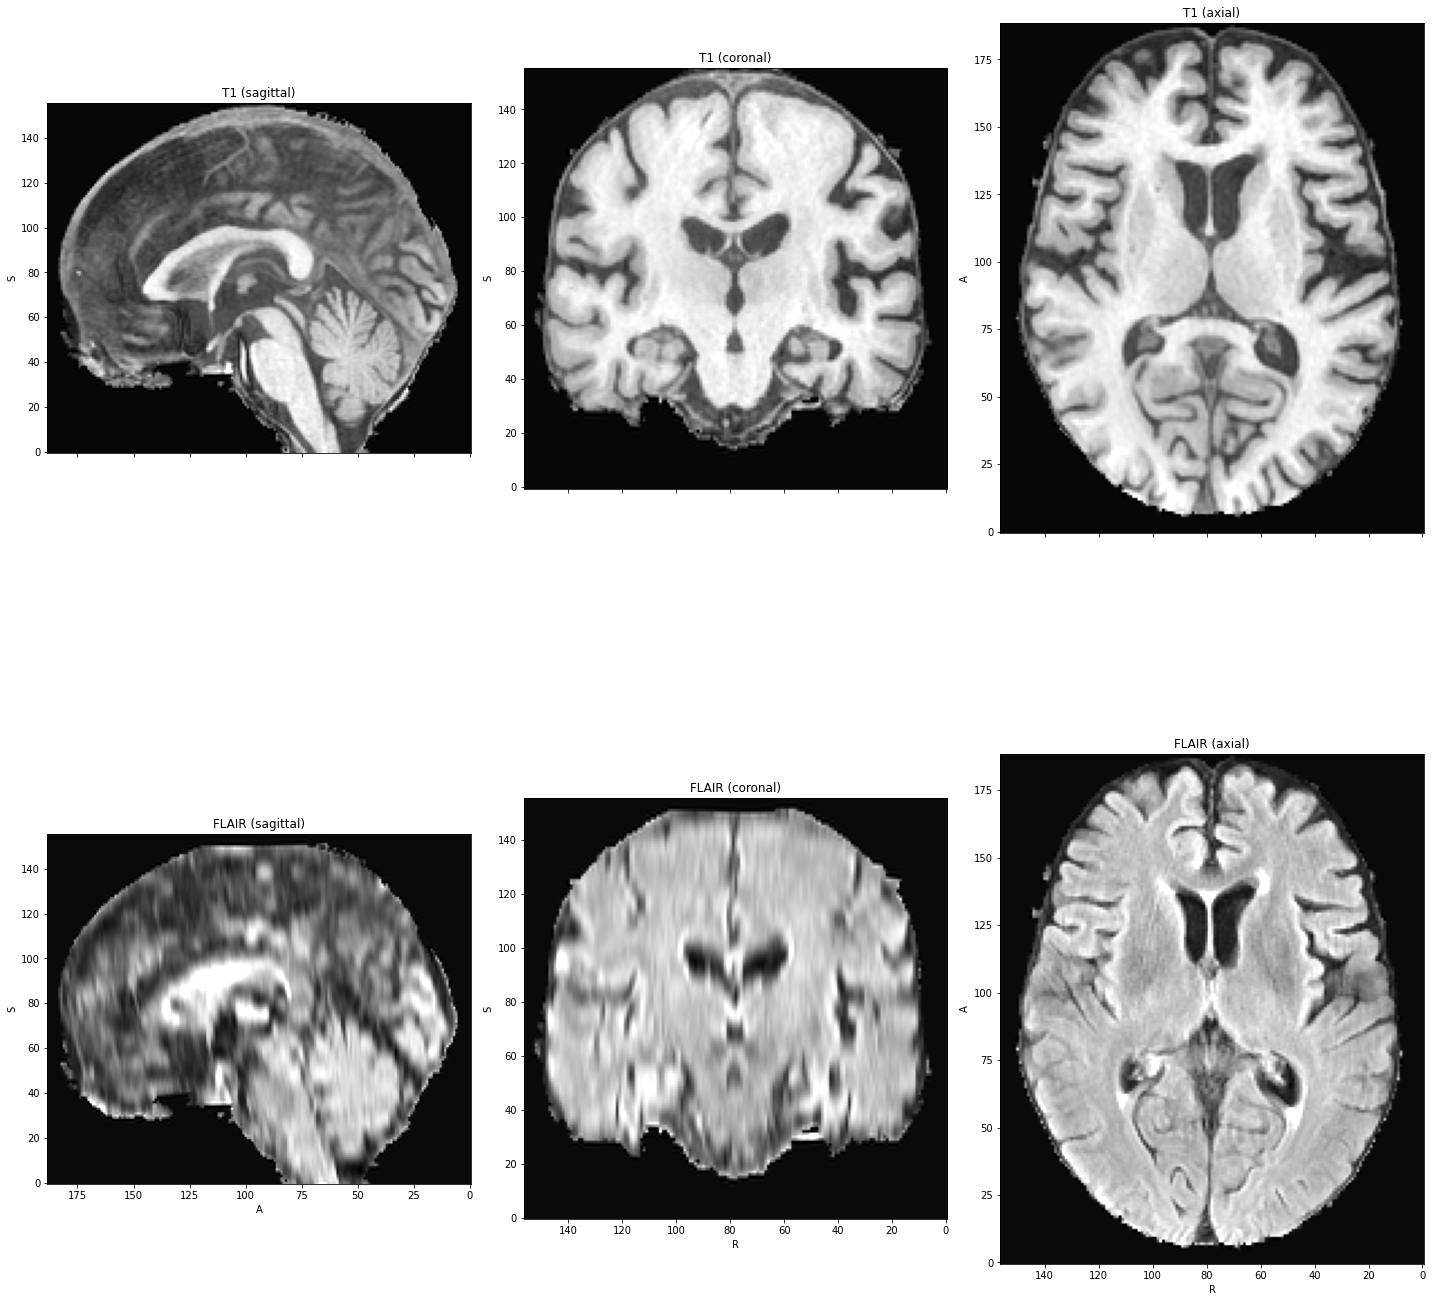



Subject: 2


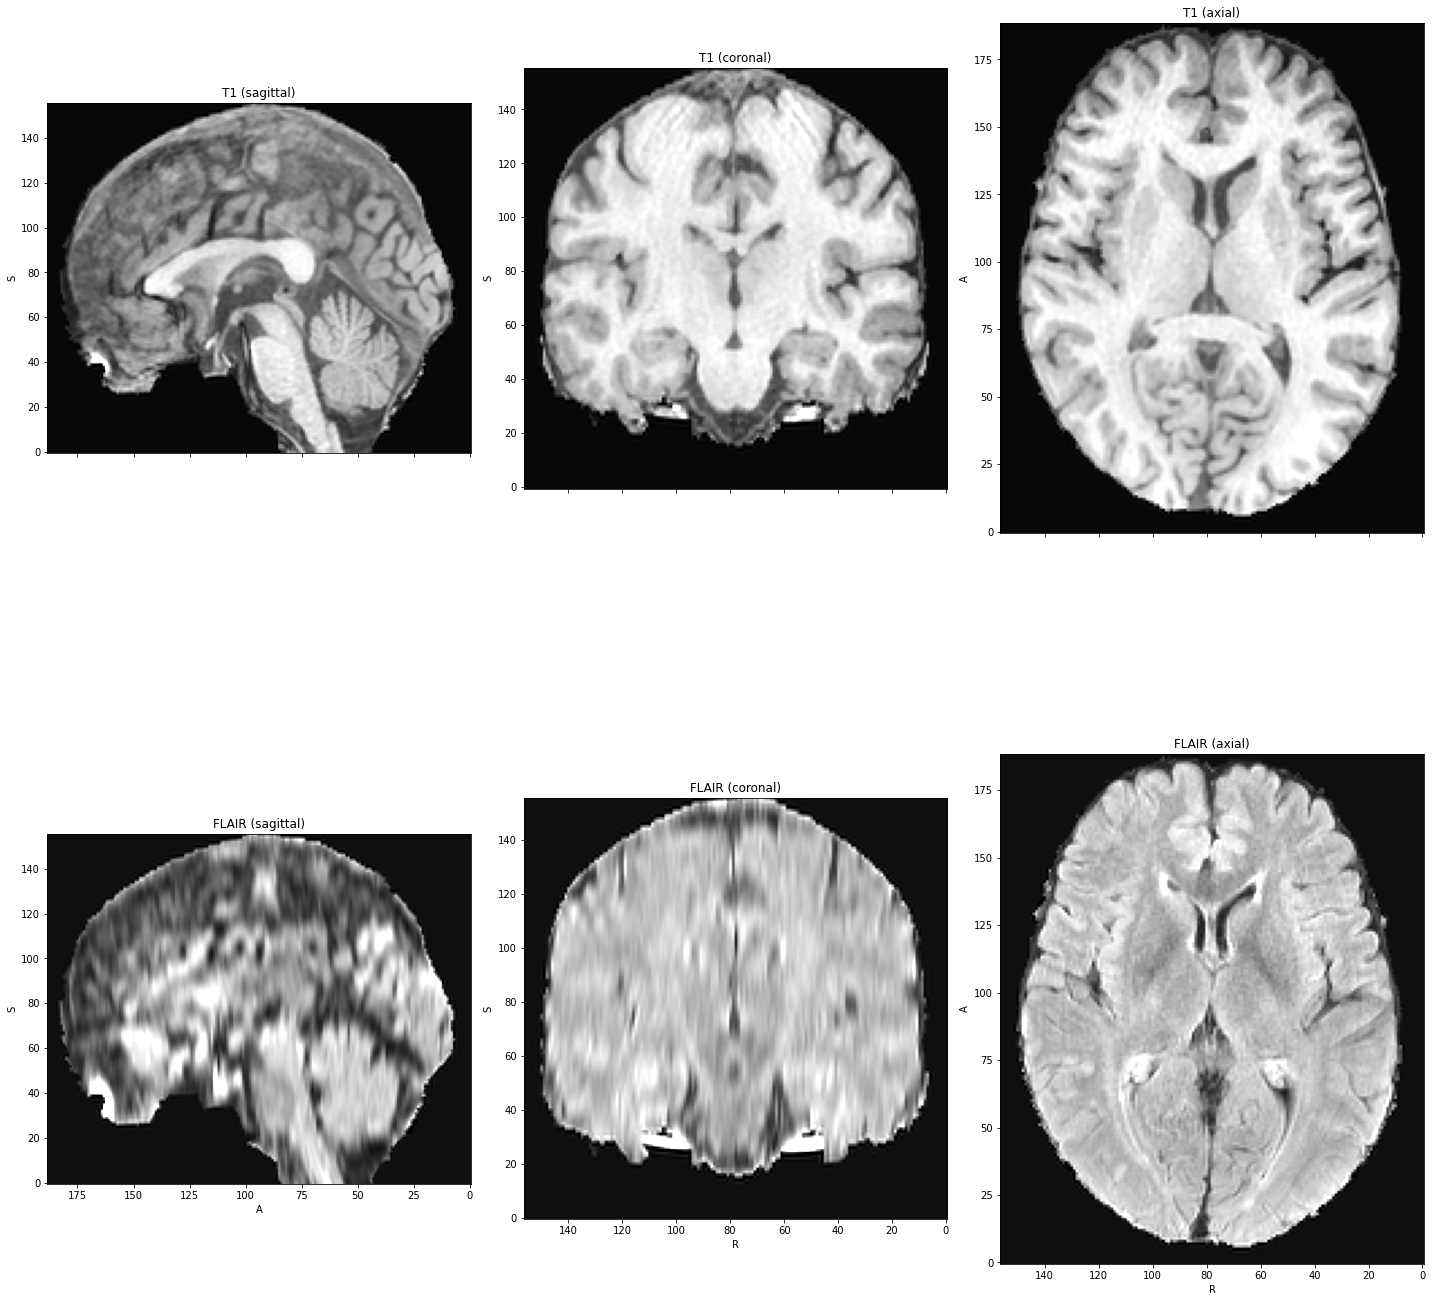



Subject: 3


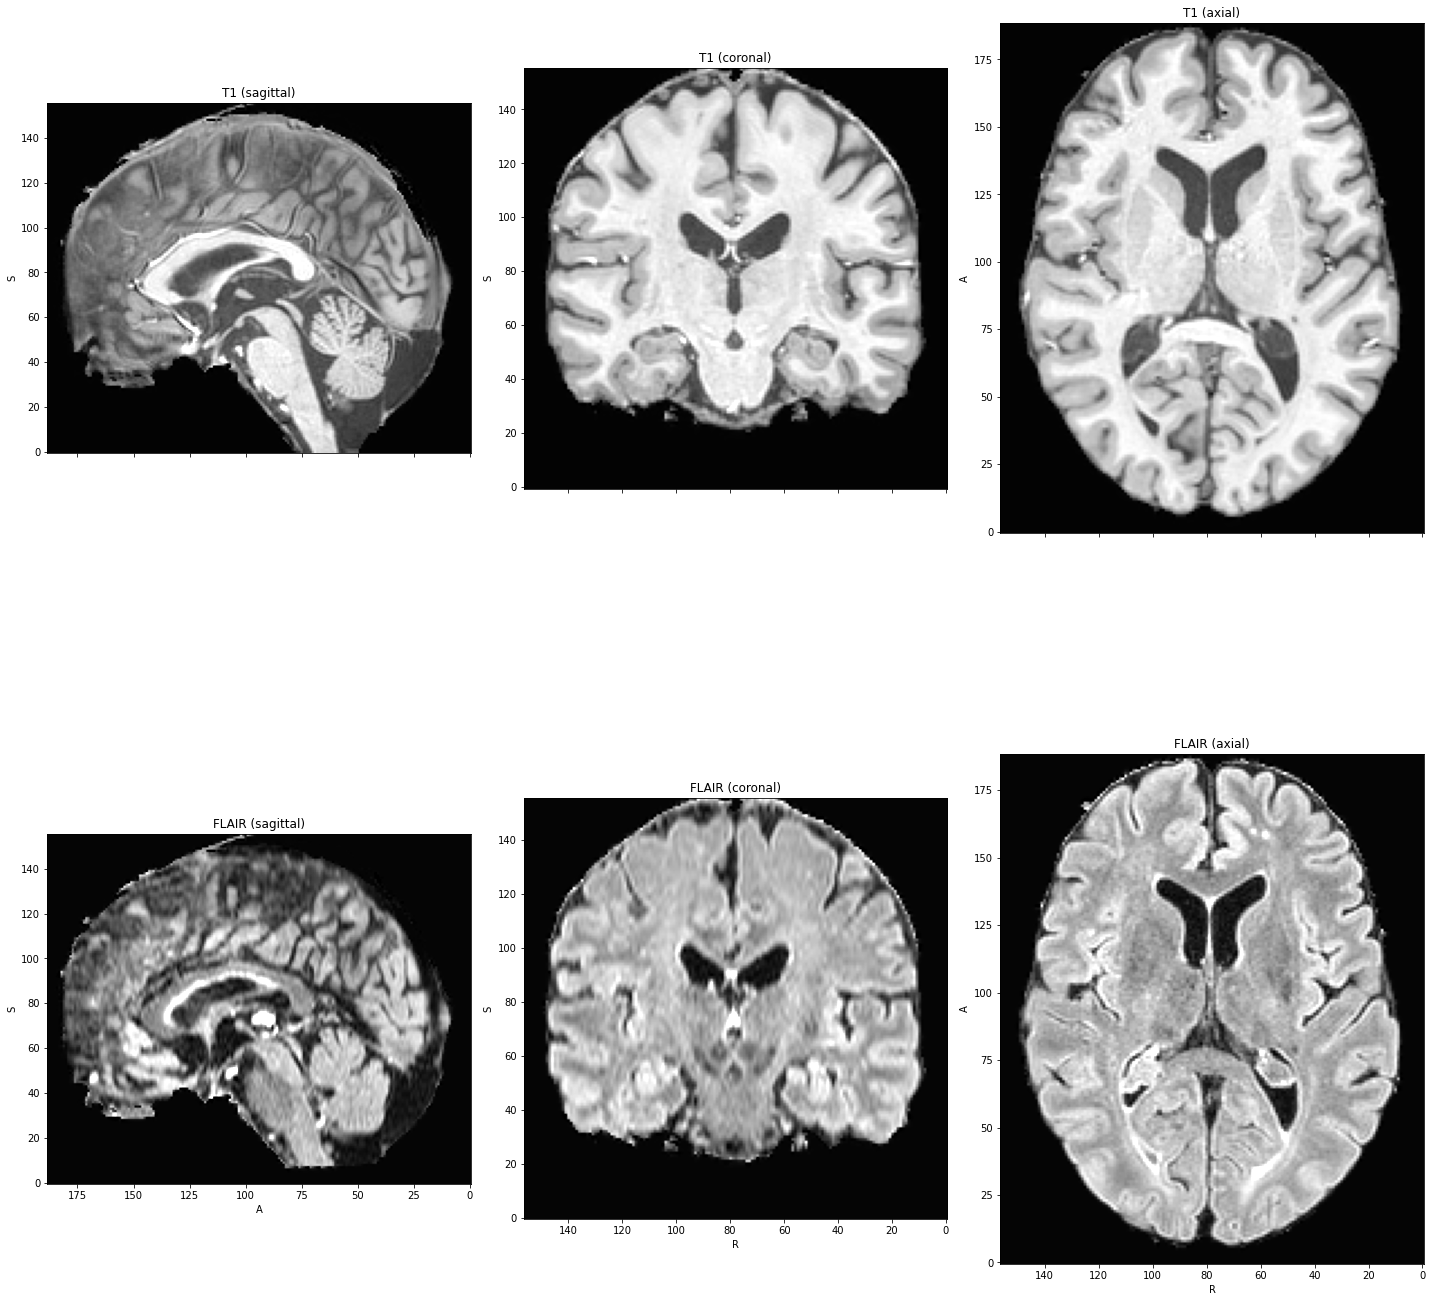



Subject: 4


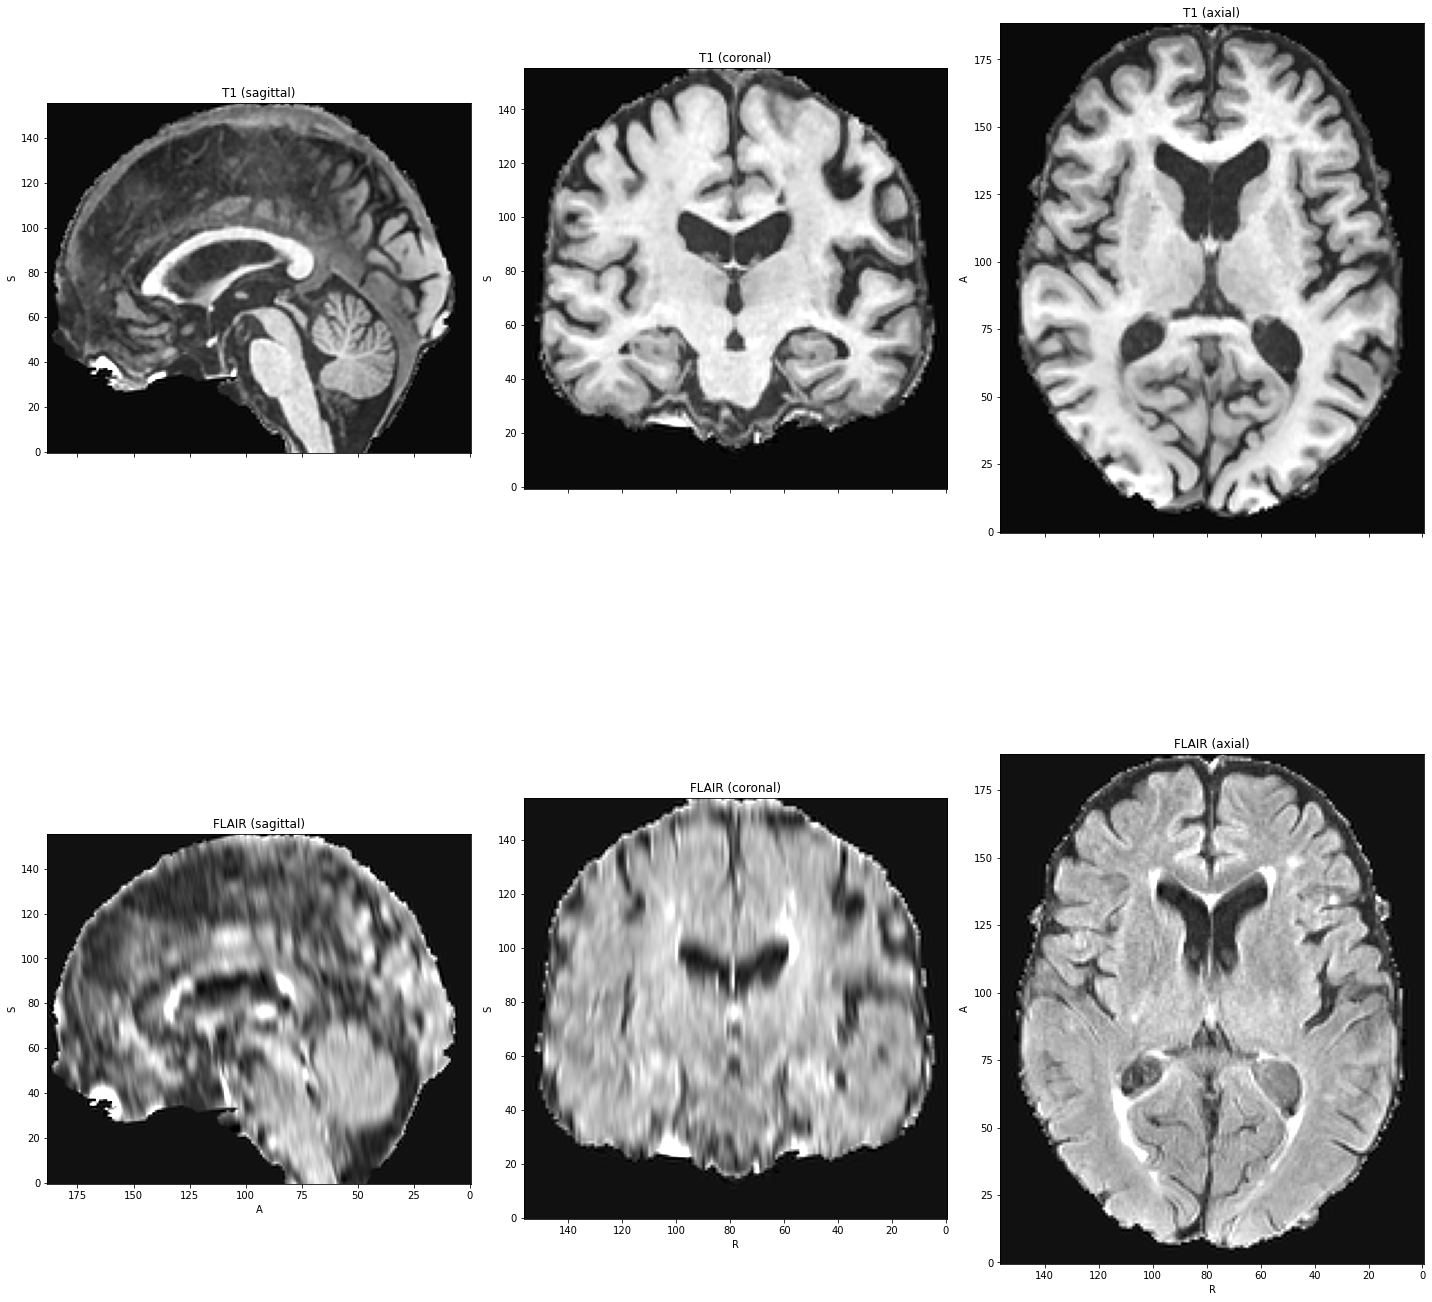

In [12]:
plot_batch(train_batch)

Subject: 1


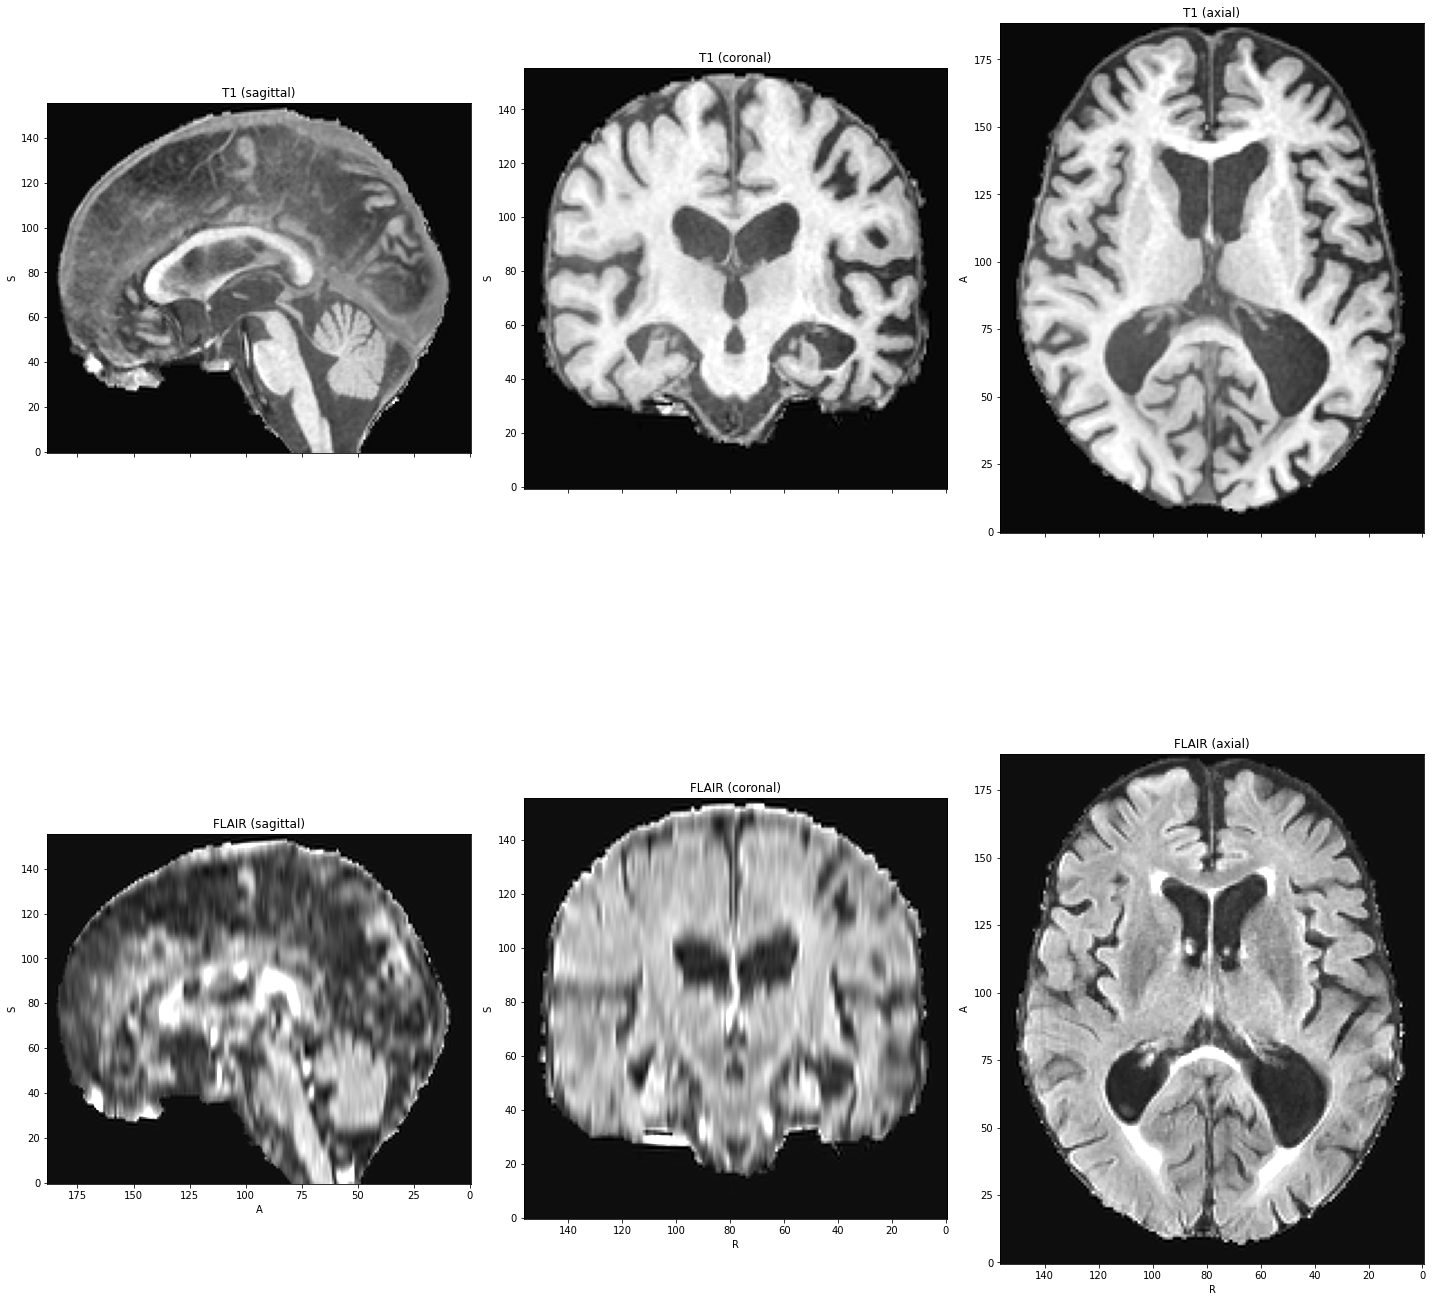



Subject: 2


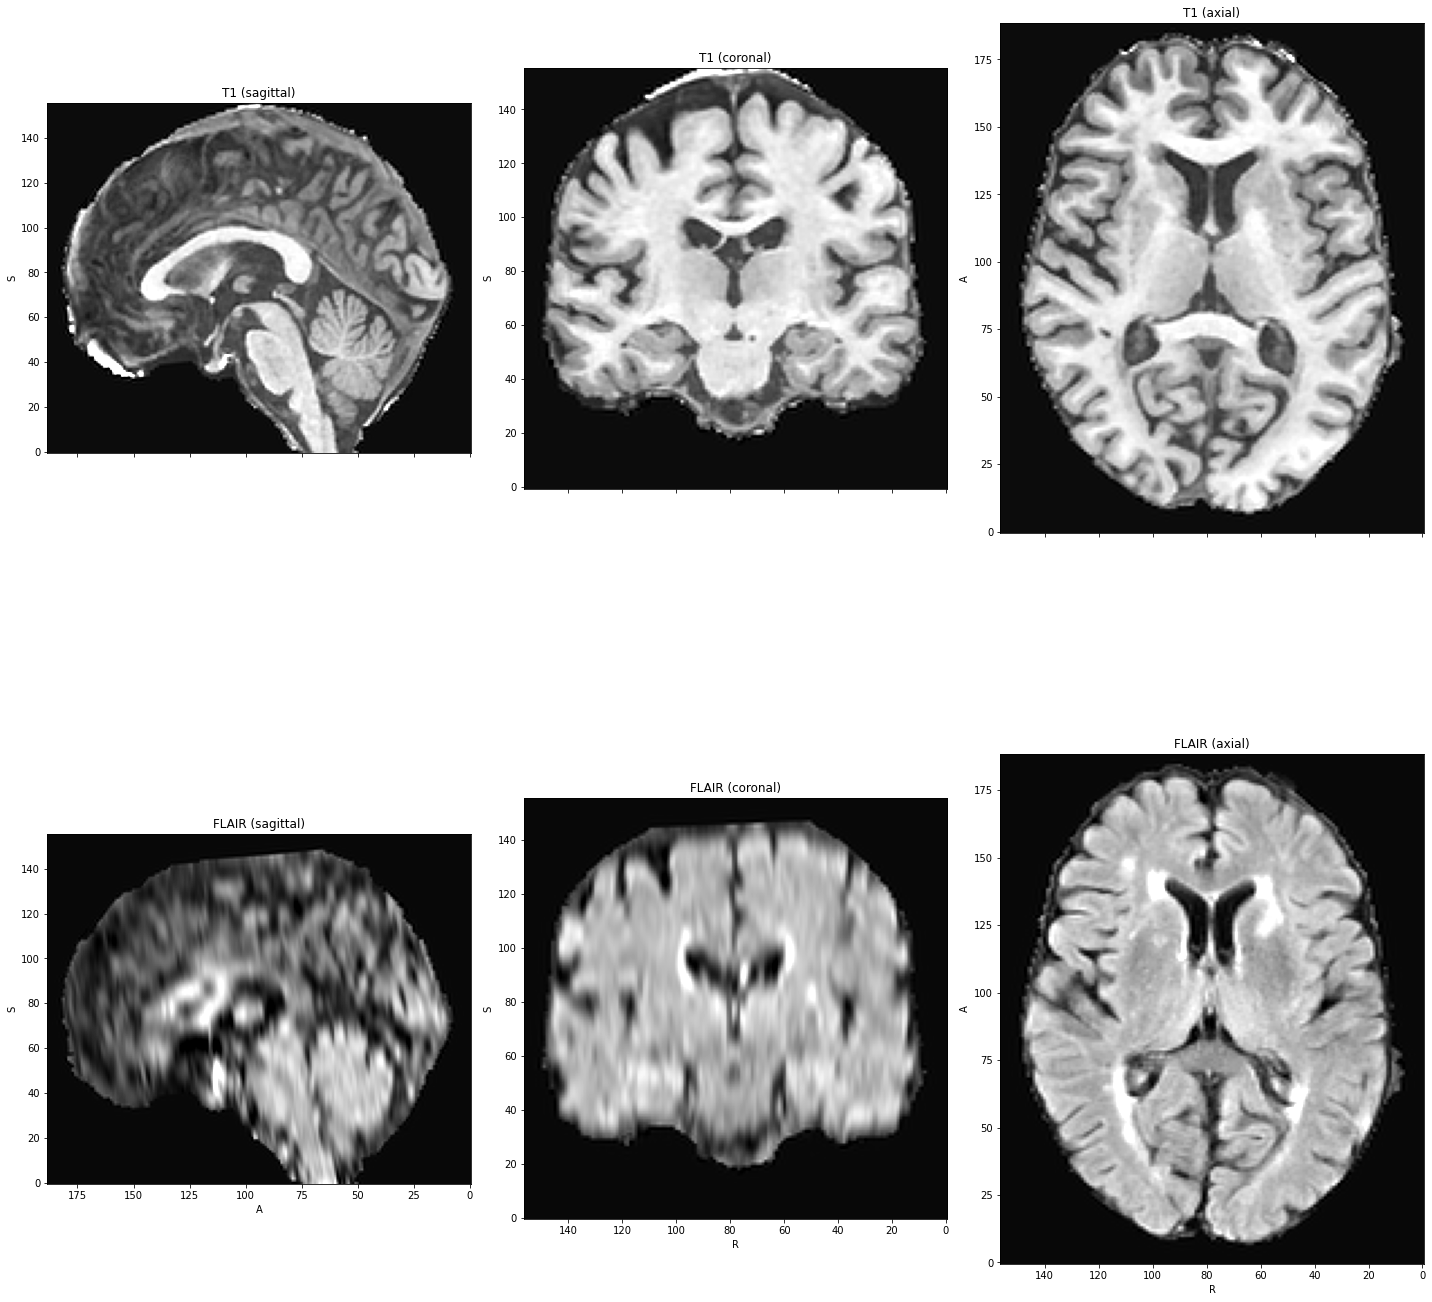



Subject: 3


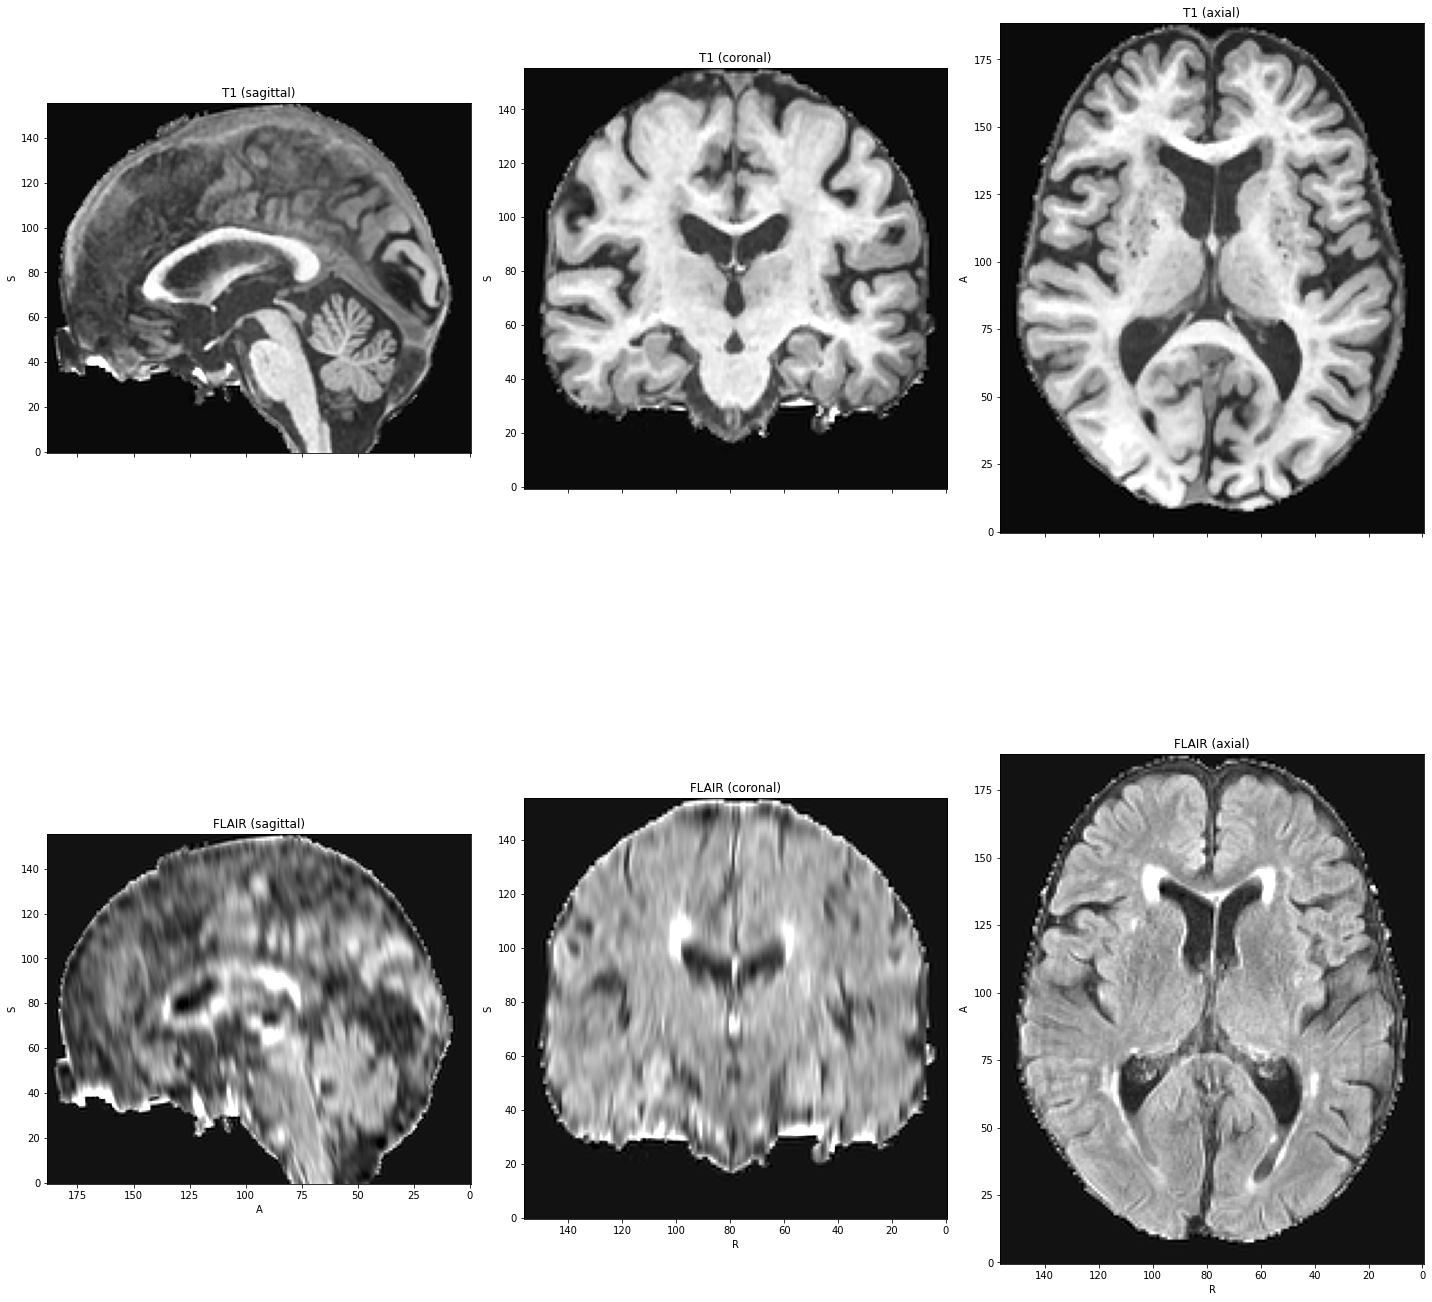



Subject: 4


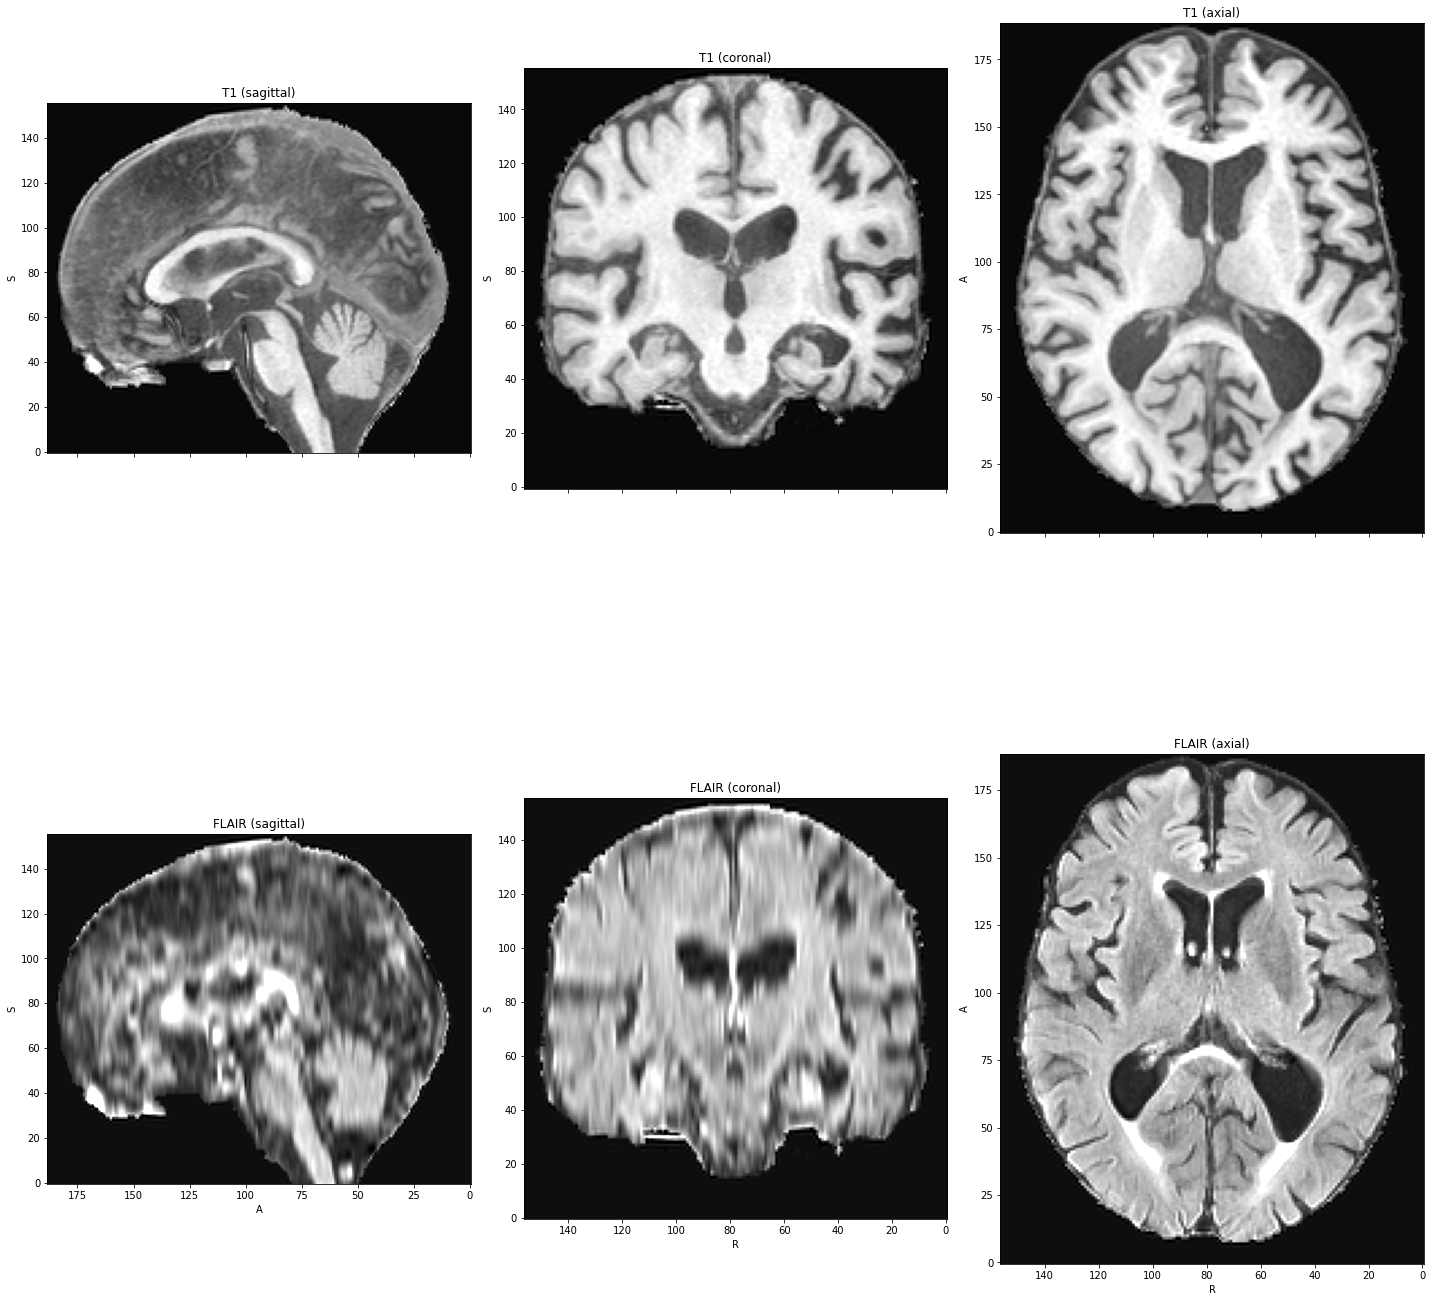

In [13]:
plot_batch(test_batch)